In [1]:
import pandas as pd
import numpy as np
from plot_provider import TaskPlotProvider

In [2]:
df = pd.read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')
provider = TaskPlotProvider(df)
df.head(2)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814


In [3]:
df.describe()

,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


In [4]:
df[df.gt_corners != df.rb_corners]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min


There are no observations where gt_corners and rb_corners differ.

However, I cannot draw a conclusion due to a lack of understanding of what this model was supposed to do (or maybe data was filtered).

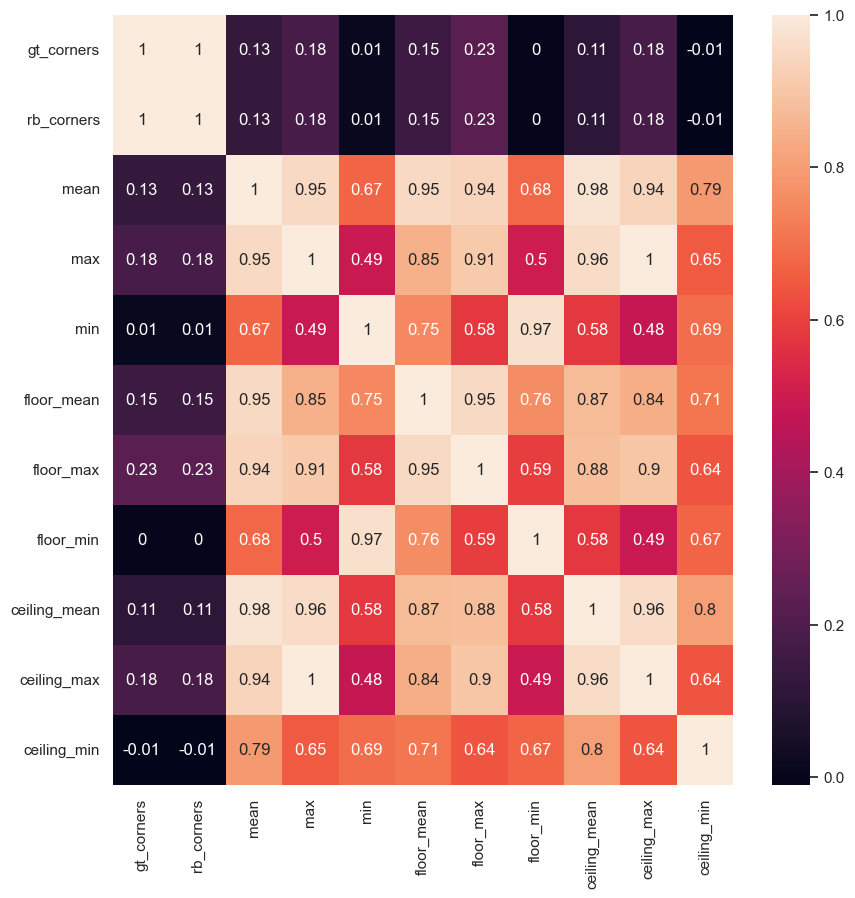

In [5]:
provider.get_heatmap();

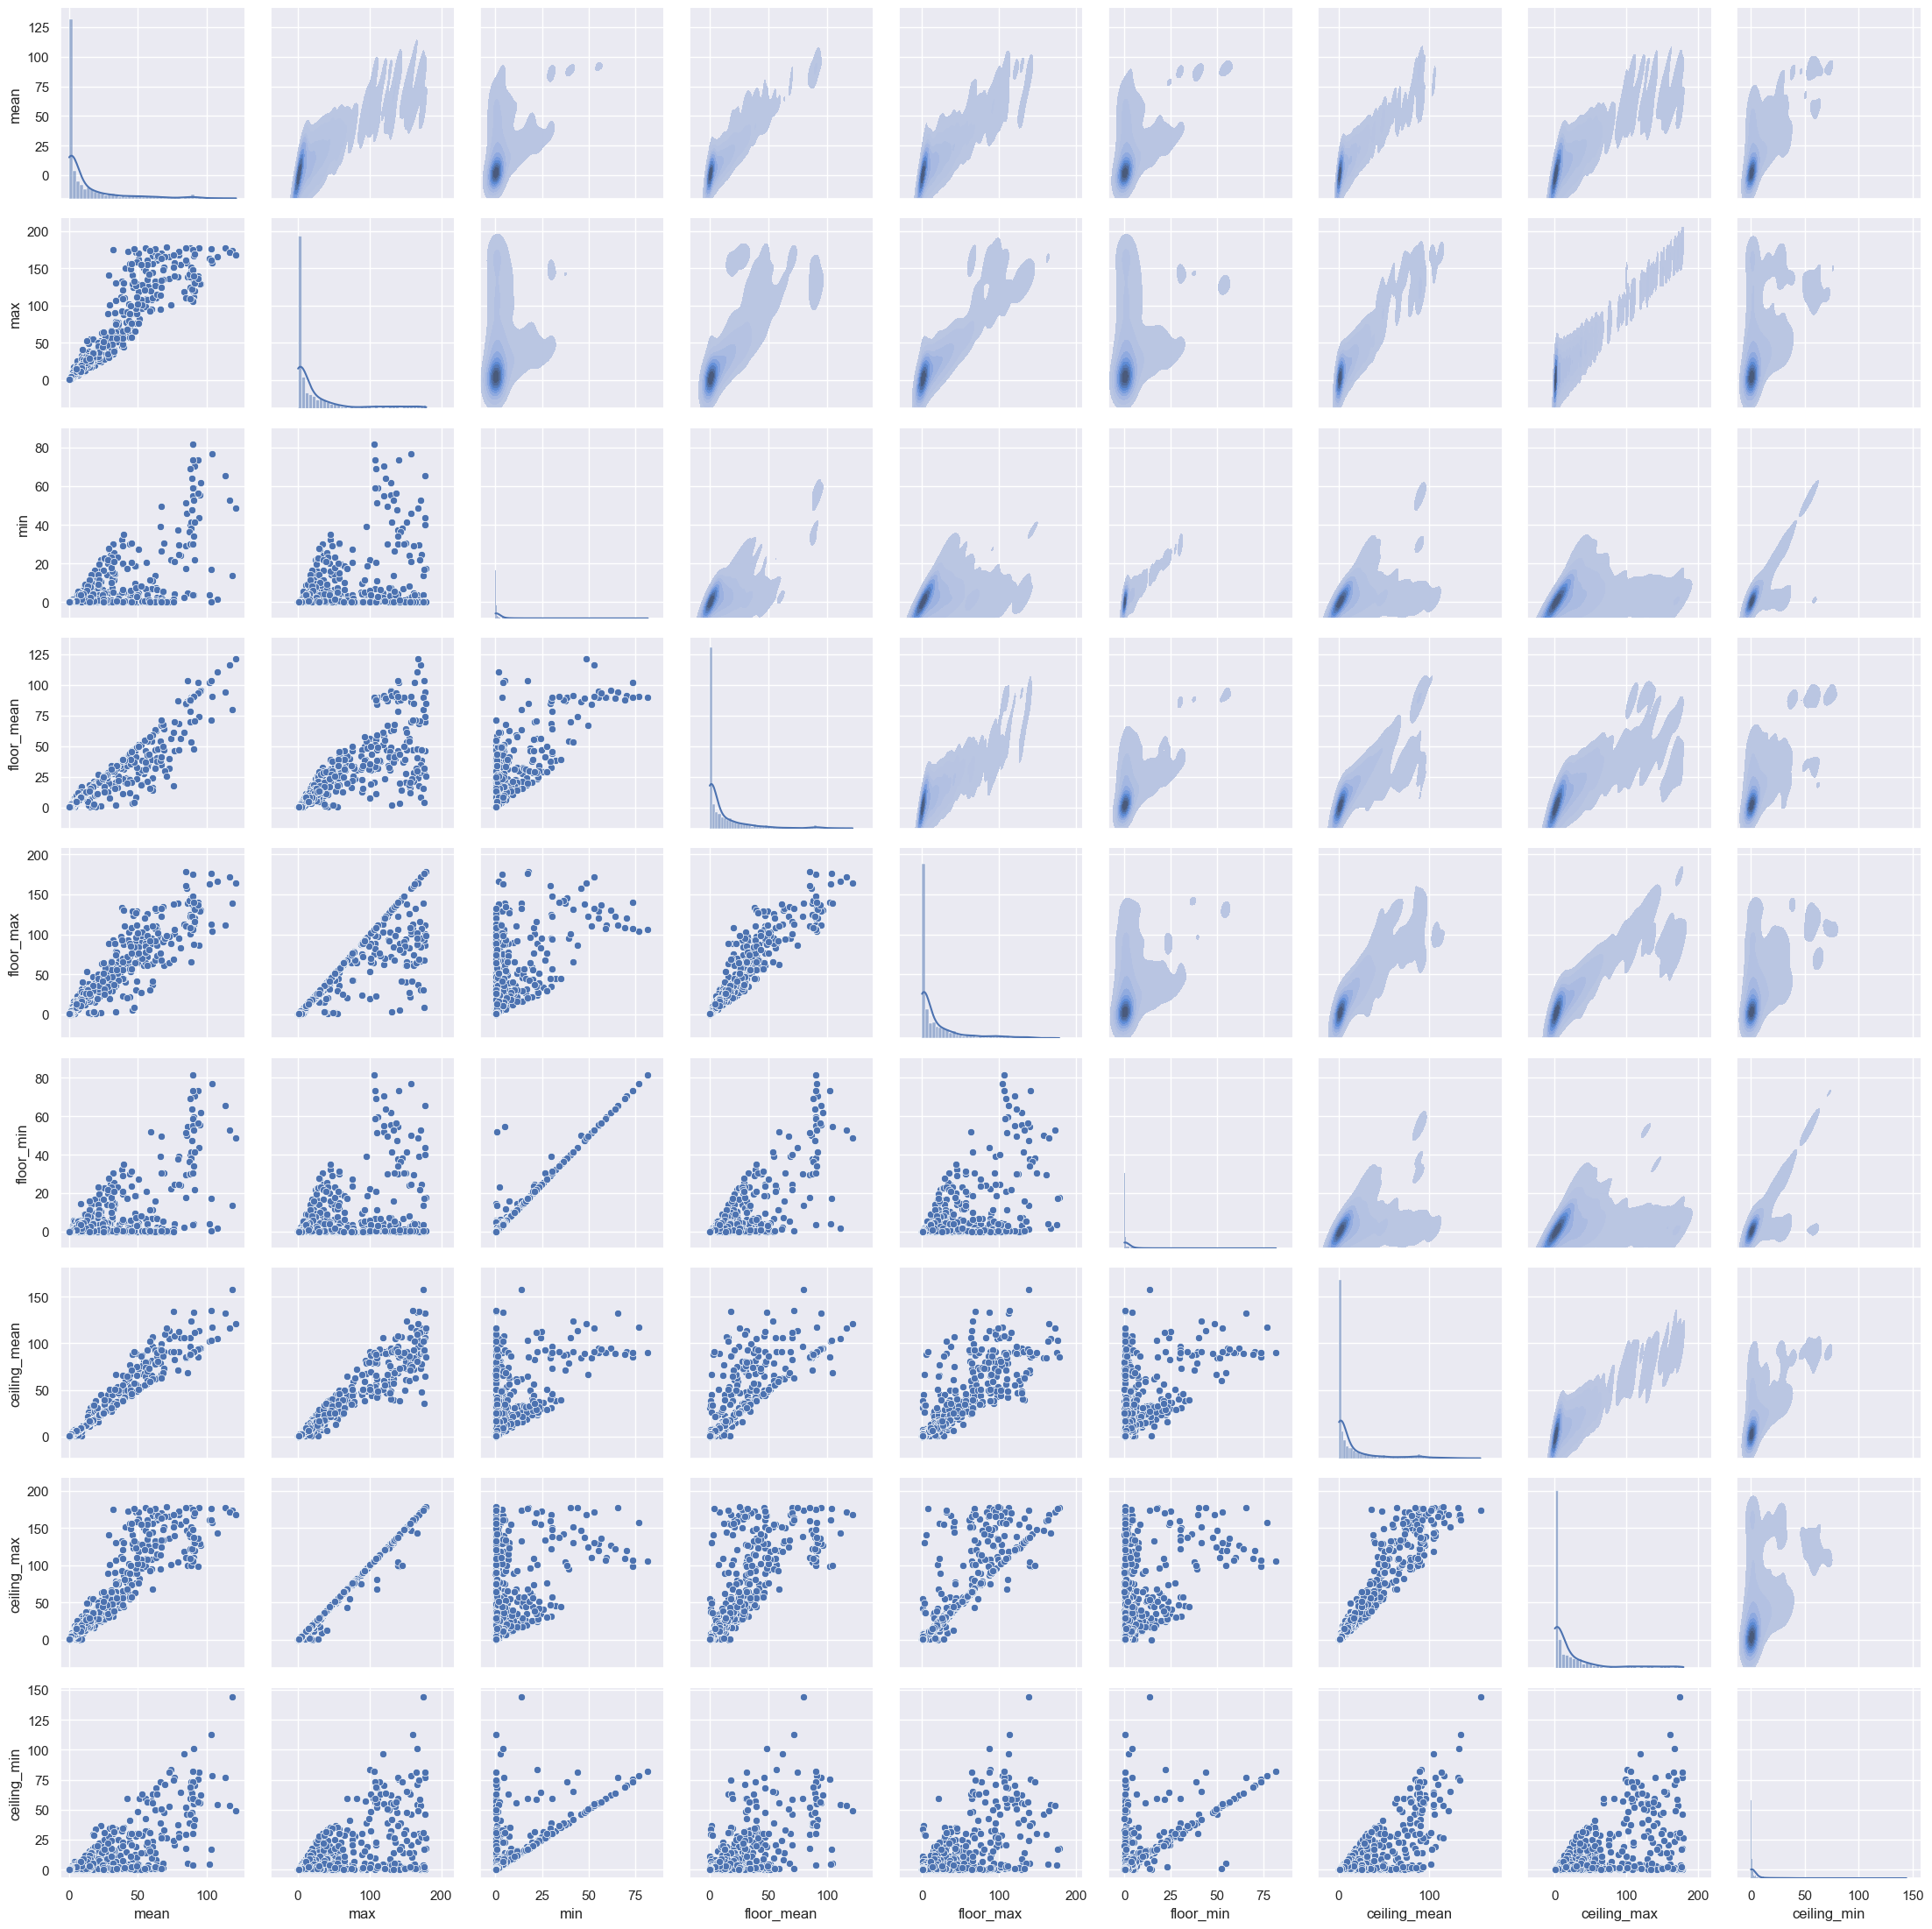

In [6]:
provider.get_grid();

- Some columns are correlated with each other almost linearly;

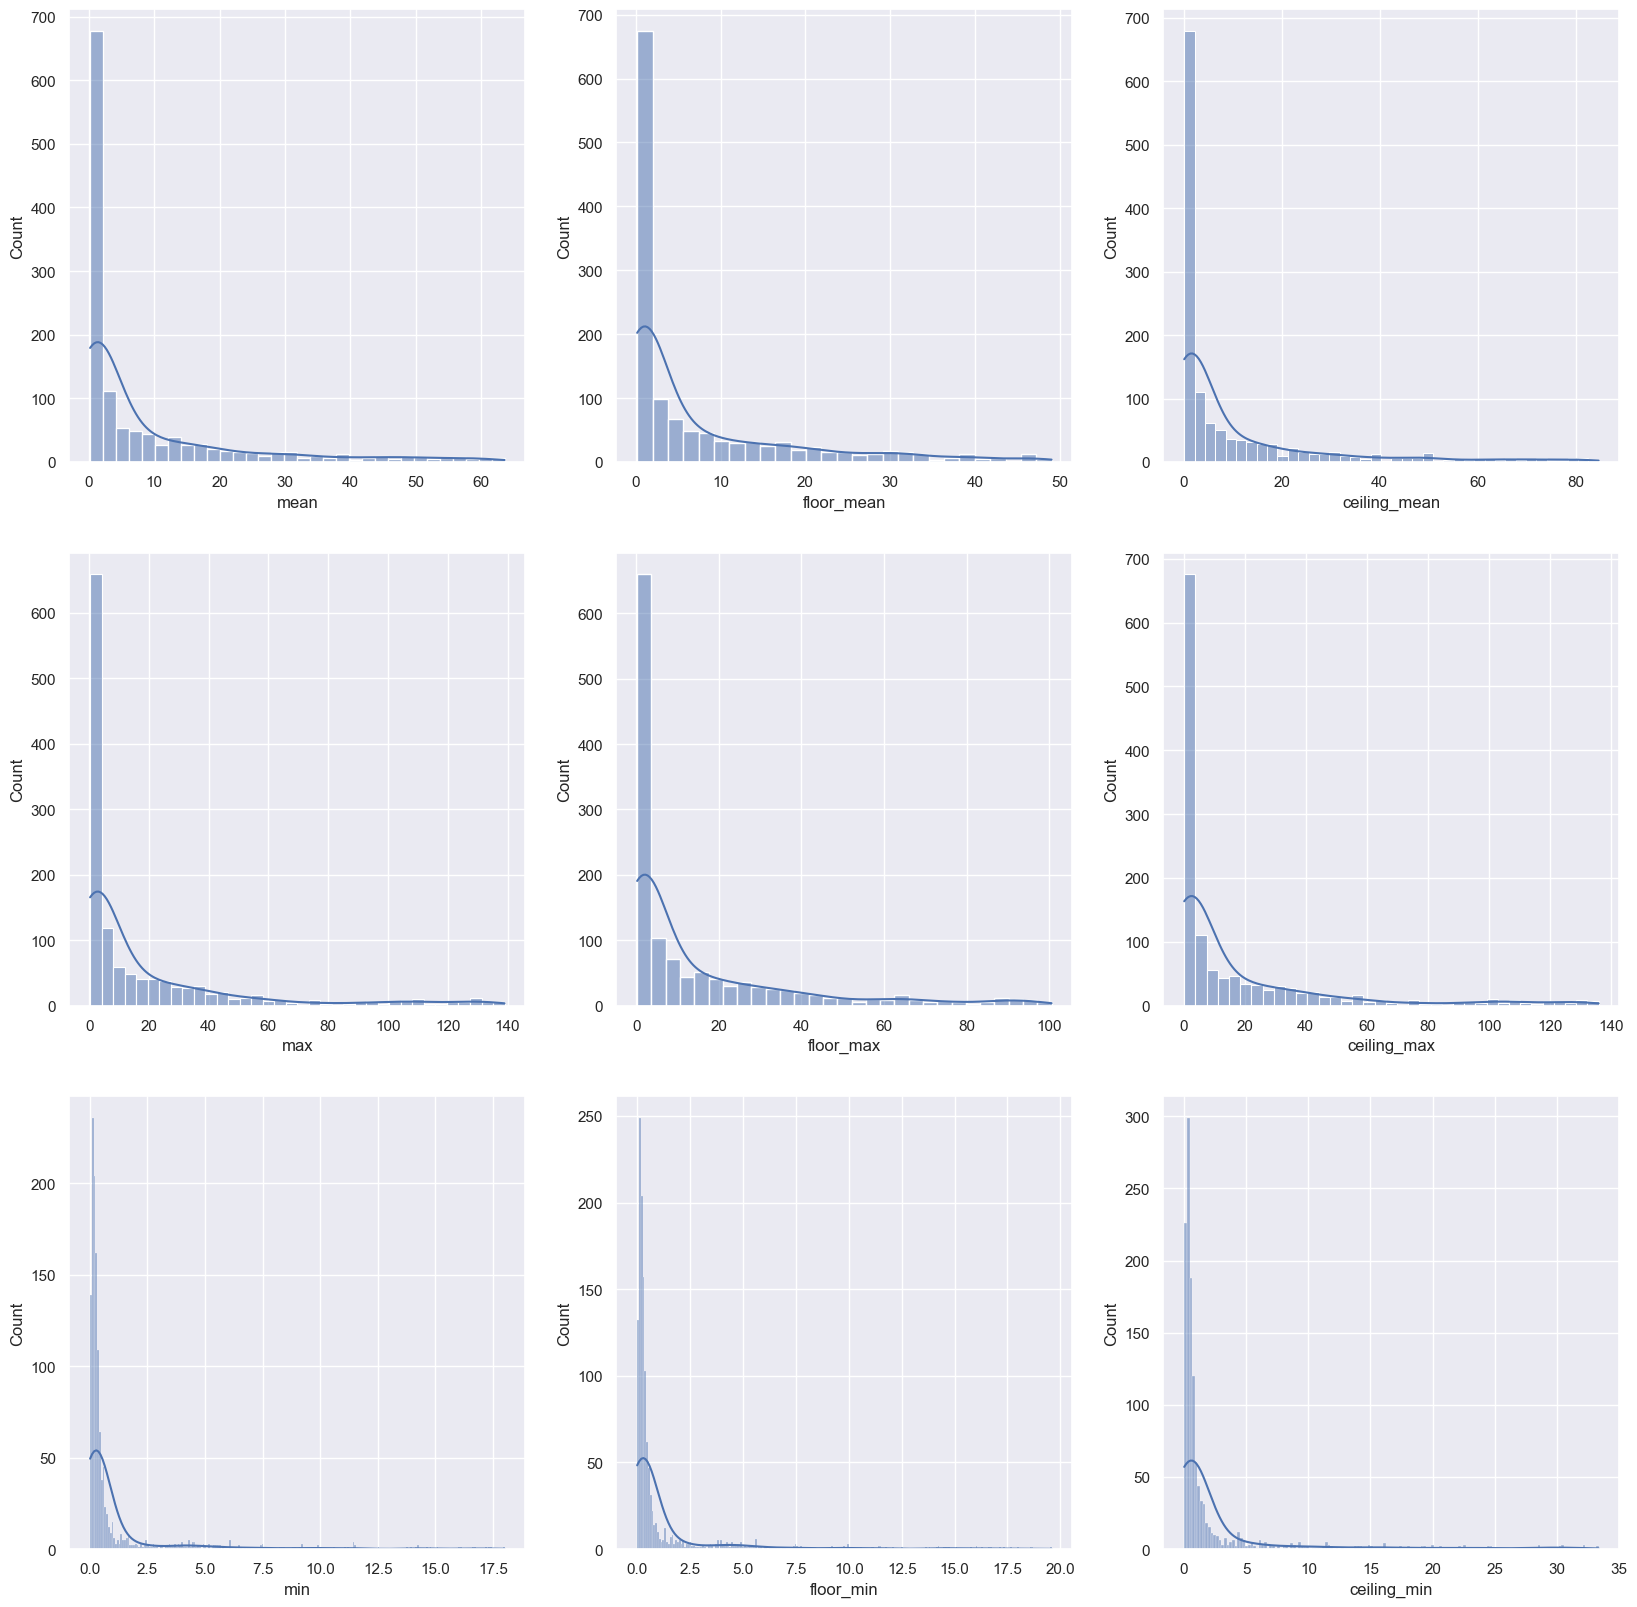

In [7]:
provider.get_hists();

- Majority of rooms have an average deviations of less than 10 degrees;
- Some of rooms has deviations higher than 50 degrees, which recuires attention;
- All values are positive, which probably means absolute values are represented.

#### Lets examine Floor and Ceiling difference distributions

Assumption: I assume here, that we are dealing with deviations of predicted values from the gt for corresponding Floor and Ceiling variables (not quite obvious from the given conditions). Lets eximine distributions of differences of corresponding Ceiling and Floor values.

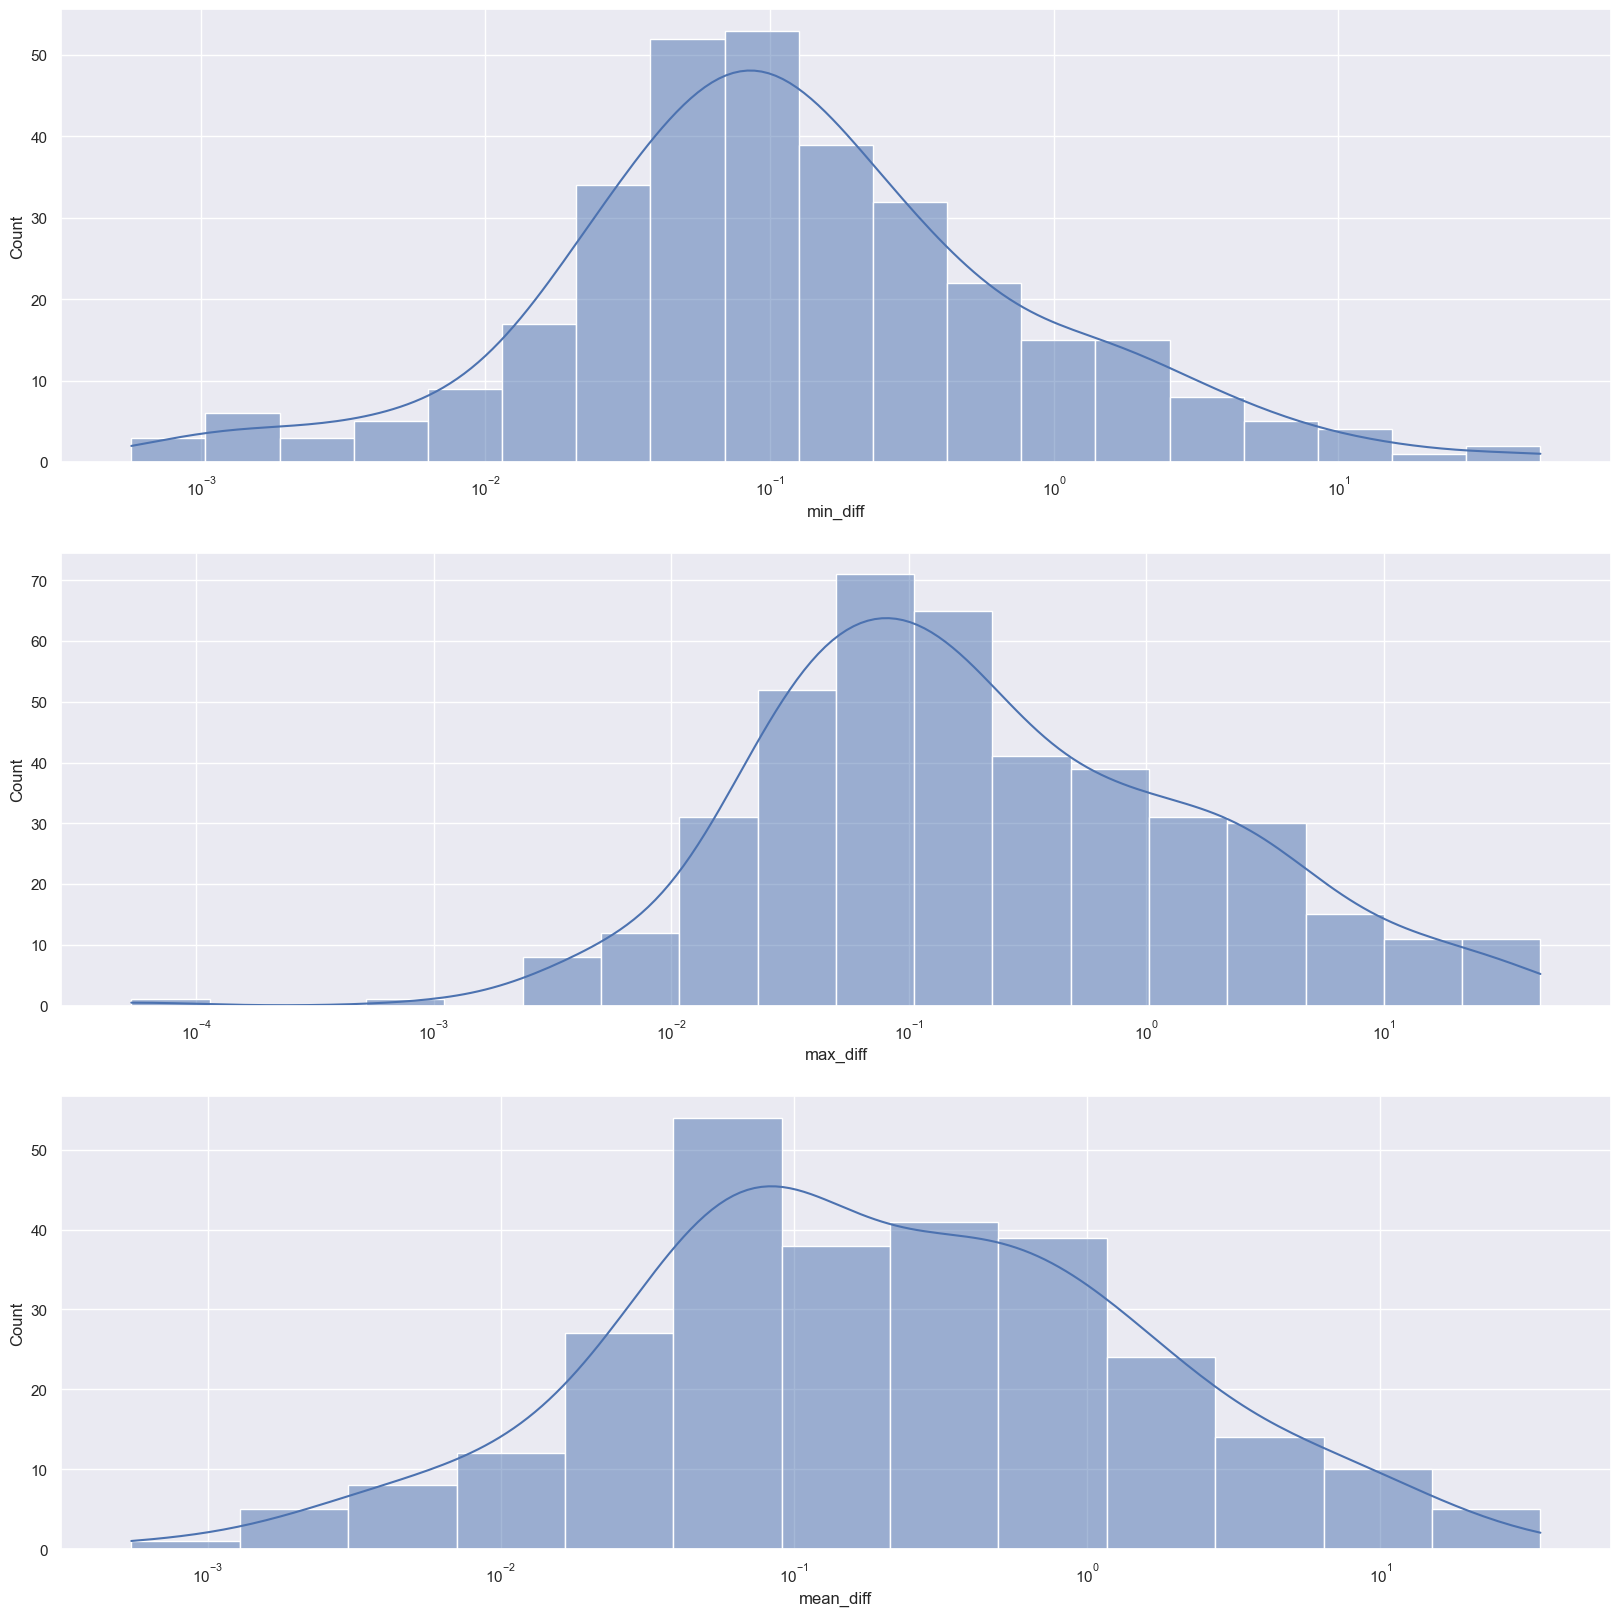

In [8]:
provider.get_diff_diviations();

- There is a slight asymmetry in the distribution. It's difficult to draw any conclusions without knowing the exact purpose of the variables, but this may mean there is some inconsistency in the predictions.
- Or it might just mean that room's ceiling often has a more complex shape than floor.

In [9]:
provider.draw_plots("./plots/", show_jupyter=False)